In [32]:
#Подготовим данные к анализу

import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
data=pd.read_csv('data.csv')

userlist=pd.read_csv('userlist.csv')
#Соединяем 2 имеющиеся таблици
df=data.merge(userlist, on = 'userID', how='left' )

#Напишем функцию первичной проверки данных
def df_info(df):
    print('Общая информация:')
    print(df.info())
    print('Проврка на пропущенные значения:')
    print(df.isna().sum())
    print('Проврка на дубликаты:')
    print('Дубликаты', df.duplicated().sum())
    


#Добавляем столбец с %-ой разницей, для понимания сколько
# именно процентов от изначальной суммы сэкономил клиент   
df['procent']=((df['exp0']-df['exp1'])/df['exp0'])*100

#Таблица с теми у кого функция включена
df_y=df[df['group']=='Y']
#Таблица с теми у кого функция включена
df_n=df[df['group']=='N']





# Разбор эксперимента.
Аналитик из генеральной совокупности сформировал выборку из 5000 пользователей функцией random или sample или любым другим методом, сделал в получившейся выборке рассылку с уведомлением о подключении некоторой функции. Через некоторое время удалил из выборки неактивных пользователей. Далее аналитик решил протестировать гипотезу на двух группах о том, что при прочих равных, новая функция снижает средние издержки пользователей. По прошествию месяца добавил столбец delta – изменение месячных транспортных расходов(exp1 - exp0). После чего функцией groupby аналитик произвел анализ в разностях средних между тестовой и контрольной группами.

# Начнем наш анализ:

In [33]:
#Первичная проверка :
df_info(df)

Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4699 entries, 0 to 4698
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  4699 non-null   int64  
 1   userID        4699 non-null   int64  
 2   exp0          4699 non-null   int64  
 3   exp1          4699 non-null   int64  
 4   delta         4699 non-null   int64  
 5   Unnamed: 0_y  4699 non-null   int64  
 6   group         4699 non-null   object 
 7   procent       4699 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 312.0+ KB
None
Проврка на пропущенные значения:
Unnamed: 0_x    0
userID          0
exp0            0
exp1            0
delta           0
Unnamed: 0_y    0
group           0
procent         0
dtype: int64
Проврка на дубликаты:
Дубликаты 0


# Оценка результатов, полученных аналитиком.

In [34]:
#Сделаем describe для столбца дельта  таблицы N
df_n['delta'].describe()

count    2664.000000
mean     -140.466592
std        62.235495
min      -361.000000
25%      -181.000000
50%      -141.000000
75%       -98.000000
max       100.000000
Name: delta, dtype: float64

In [35]:
#Сделаем describe для таблицы Y
df_y['delta'].describe()

count    2035.000000
mean     -111.920393
std        58.351127
min      -333.000000
25%      -149.000000
50%      -113.000000
75%       -74.000000
max        97.000000
Name: delta, dtype: float64

#### Вывод: Данные не корректно отображают работы функции(по результатам получается,  что функция не работает или работает не корректно, буд-то бы пользователи не экономят деньги )

# Преобразуем полученные данные
### В качестве основной метрики примим процент сэкономленных денег, а не дельту

In [36]:
#Сделаем describe для таблицы столбца процент  таблицы N
#это более наглядная метрика
df_n['procent'].describe()

count    2664.000000
mean        2.785684
std         1.756699
min        -3.360717
25%         1.588222
50%         2.446007
75%         3.659311
max        13.693346
Name: procent, dtype: float64

<AxesSubplot:>

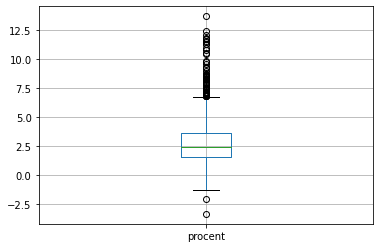

In [37]:
#Построим ящик с усами для таблицы N - распределение нормальное
df_n.boxplot('procent')

In [38]:
#Сделаем describe для таблицы столбца процент  таблицы Y 
#это более наглядная метрика
df_y['procent'].describe()

count    2035.000000
mean        5.479252
std         3.889150
min        -3.835508
25%         2.987279
50%         4.841499
75%         7.317396
max        39.759036
Name: procent, dtype: float64

<AxesSubplot:>

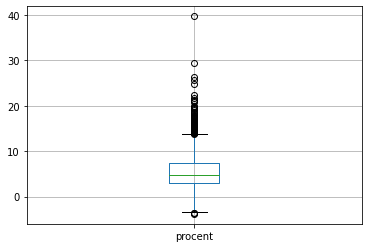

In [39]:
#Построим ящик с усами для таблицы Y - распределение нормальное
df_y.boxplot('procent')

# Вывод
#### По полученным результатам видно, что среднее значение по столбцу процент  у группы Y(те кто пользовался функцией) 5.479%, а у группы  N 2.785%, эти данные более наглядны т.к. говорят об экономии средств но для более точных результатов я бы взял бОльшую выборку с одинаковым колличеством пользователей и бОльший временной интервал.

# Сделаем  выборку Y с таким же колличеством клиентов как в выборке N и найдем среднее

In [41]:
df_n=df_n.sample(n=2035)
df_n['procent'].describe()


count    2035.000000
mean        2.799736
std         1.783349
min        -3.360717
25%         1.586354
50%         2.459016
75%         3.663990
max        13.693346
Name: procent, dtype: float64

### Иследование не дало каких-то неожиданных результатов, среднее значение практически такое же что и до этого. Предыдущие выводы сохраняются